# Simple Time Series for Stock

## Time Series Analysis is use for to identify patterns. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

import warnings
warnings.filterwarnings("ignore") 

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'SPY'
start = '2007-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,142.250000,142.860001,140.570007,141.369995,110.520622,94807600
2007-01-04,141.229996,142.050003,140.610001,141.669998,110.755142,69620600
2007-01-05,141.330002,141.399994,140.380005,140.539993,109.871742,76645300
2007-01-08,140.820007,141.410004,140.250000,141.190002,110.379898,71655000
2007-01-09,141.309998,141.600006,140.399994,141.070007,110.286095,75680100


In [3]:
dataset.shape

(3020, 6)

In [4]:
dataset.index

DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
               '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
               '2007-01-16', '2007-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=3020, freq=None)

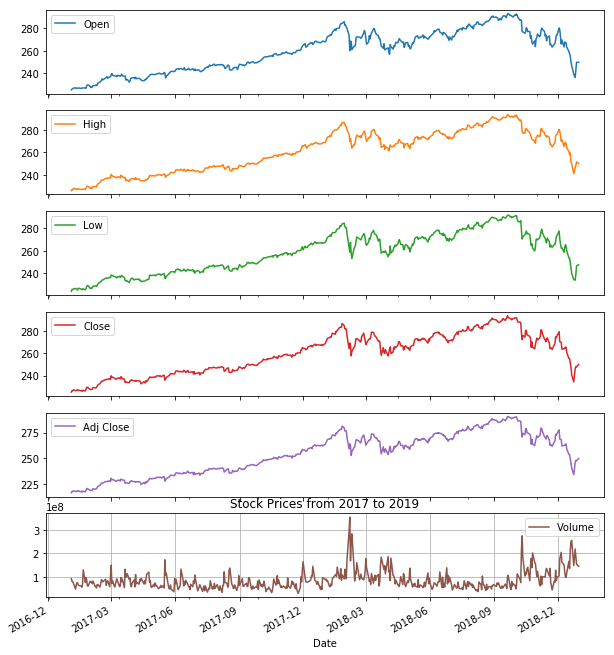

In [5]:
dataset['2017':'2019'].plot(subplots=True, figsize=(10,12))
plt.title('Stock Prices from 2017 to 2019')
plt.grid()
plt.show()

In [6]:
# Create data
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2007-01-04,141.229996,142.050003,140.610001,141.669998,110.755142,69620600,0.215782,0.010241,1,1,0,0.002122
2007-01-05,141.330002,141.399994,140.380005,140.539993,109.871742,76645300,0.222587,0.007266,0,0,1,-0.007976
2007-01-08,140.820007,141.410004,140.250000,141.190002,110.379898,71655000,0.216163,0.008271,1,1,0,0.004625
2007-01-09,141.309998,141.600006,140.399994,141.070007,110.286095,75680100,0.219545,0.008547,0,0,1,-0.000850
2007-01-10,140.580002,141.570007,140.300003,141.539993,110.653534,72428000,0.212879,0.009052,0,1,1,0.003332



B         business day frequency
C         custom business day frequency (experimental)
D         calendar day frequency
W         weekly frequency
M         month end frequency
SM        semi-month end frequency (15th and end of month)
BM        business month end frequency
CBM       custom business month end frequency
MS        month start frequency
SMS       semi-month start frequency (1st and 15th)
BMS       business month start frequency
CBMS      custom business month start frequency
Q         quarter end frequency
BQ        business quarter endfrequency
QS        quarter start frequency
BQS       business quarter start frequency
A         year end frequency
BA, BY    business year end frequency
AS, YS    year start frequency
BAS, BYS  business year start frequency
BH        business hour frequency
H         hourly frequency
T, min    minutely frequency
S         secondly frequency
L, ms     milliseonds
U         microseconds
N, us     nanoseconds

In [7]:
tsW = dataset.index.to_period('W')
tsM = dataset.index.to_period('M')
tsY = dataset.index.to_period('A')

In [8]:
tsW = dataset['Adj Close'].resample('W').last()
tsW.head()

Date
2007-01-07    109.871742
2007-01-14    111.982559
2007-01-21    111.654213
2007-01-28    111.114777
2007-02-04    113.209953
Freq: W-SUN, Name: Adj Close, dtype: float64

In [9]:
tsM = dataset['Adj Close'].asfreq('M').ffill()
tsM.head()

Date
2007-01-31    112.381241
2007-02-28    110.176605
2007-03-31    110.176605
2007-04-30    116.390343
2007-05-31    120.338364
Freq: M, Name: Adj Close, dtype: float64

In [10]:
tsY = dataset['Adj Close'].asfreq('BY')
tsY.head()

Date
2007-12-31    116.413773
2008-12-31     73.579315
2009-12-31     92.968788
2010-12-31    106.966270
2011-12-30    108.993294
Freq: BA-DEC, Name: Adj Close, dtype: float64

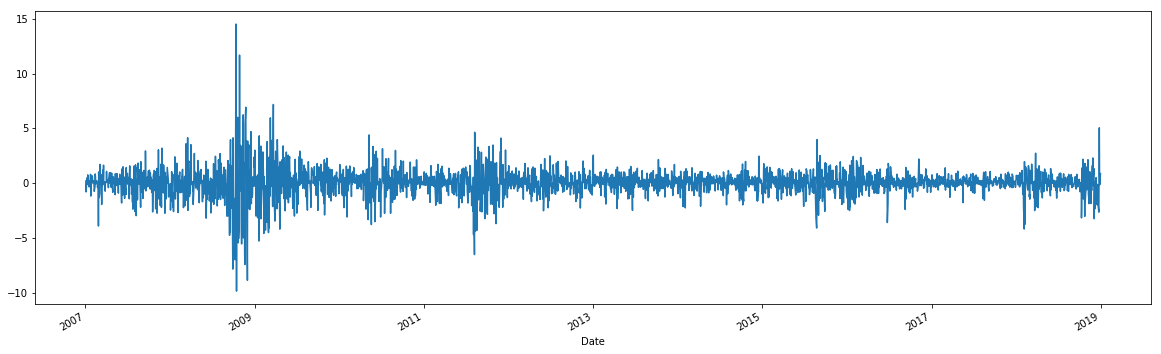

In [11]:
dataset['Returns'].mul(100).plot(figsize=(20,6)) # Plot returns

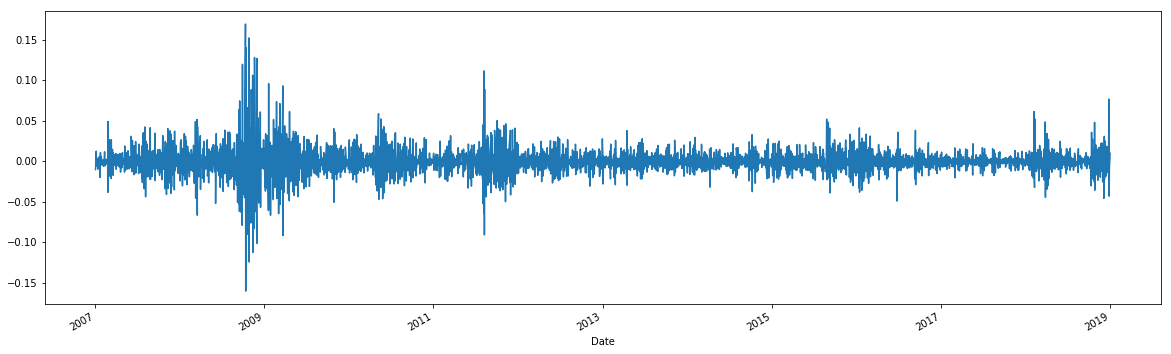

In [12]:
dataset['Returns'].diff().plot(figsize=(20,6))

In [13]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# Plot OHLC Bar Chart
trace = go.Ohlc(x=dataset['12-2018'].index,
                open=dataset['12-2018'].Open,
                high=dataset['12-2018'].High,
                low=dataset['12-2018'].Low,
                close=dataset['12-2018'].Close)
data = [trace]
iplot(data, filename='simple_ohlc')

In [14]:
# Plot Candlestick Chart
trace = go.Candlestick(x=dataset['12-2018'].index,
                open=dataset['12-2018'].Open,
                high=dataset['12-2018'].High,
                low=dataset['12-2018'].Low,
                close=dataset['12-2018'].Close)

data = [trace]
iplot(data, filename='simple_ohlc')

## Stock data is non-stationary

Stationary of time series data is one where the mean of the series is no longer a function of time such as mean, variance, and autocorrelation are all constant over time. 

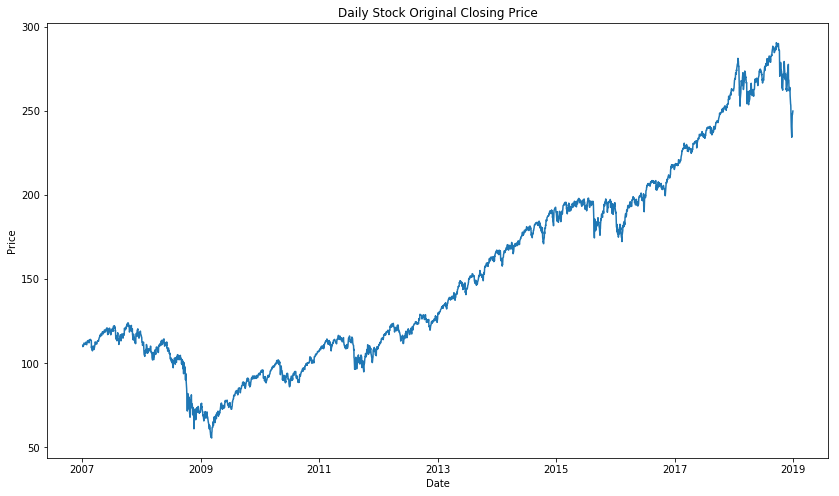

In [15]:
plt.figure(figsize=(14,8))
plt.plot(dataset['Adj Close'])
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("Daily Stock Original Closing Price")
plt.show()

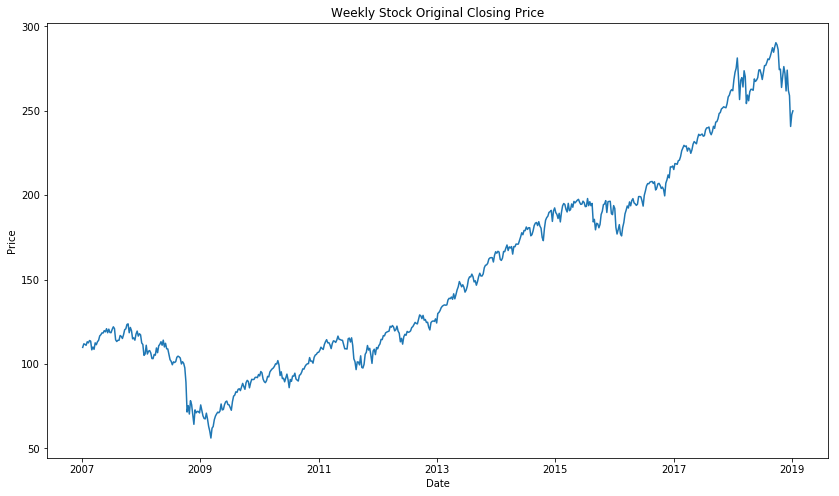

In [16]:
plt.figure(figsize=(14,8))
plt.plot(tsW)
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("Weekly Stock Original Closing Price")
plt.show()

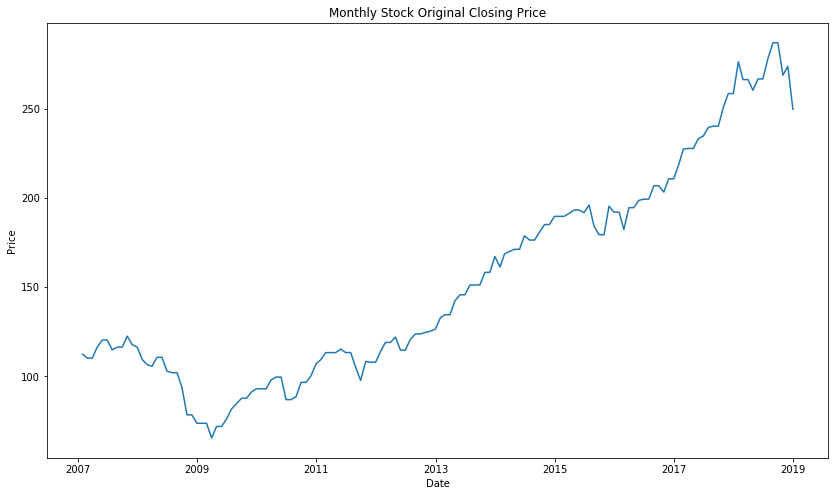

In [17]:
plt.figure(figsize=(14,8))
plt.plot(tsM)
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("Monthly Stock Original Closing Price")
plt.show()

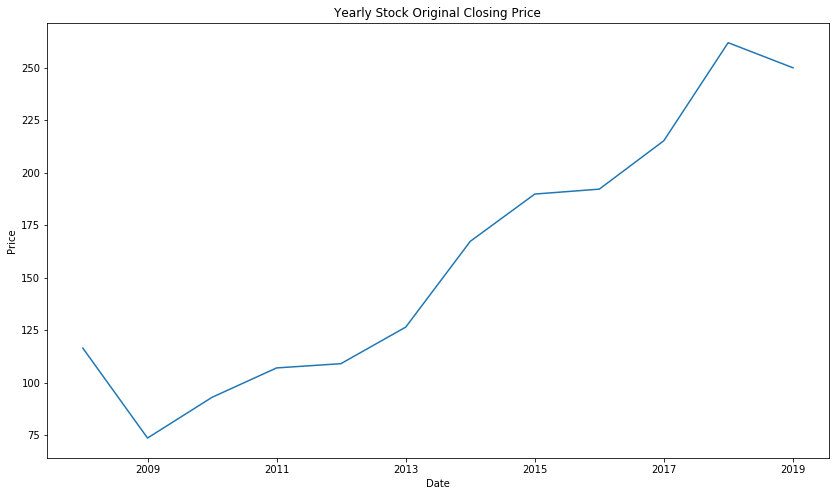

In [18]:
plt.figure(figsize=(14,8))
plt.plot(tsY)
plt.ylabel("Price")
plt.xlabel("Date")
plt.title("Yearly Stock Original Closing Price")
plt.show()

## Autocorrelation and Partial Autocorrelation

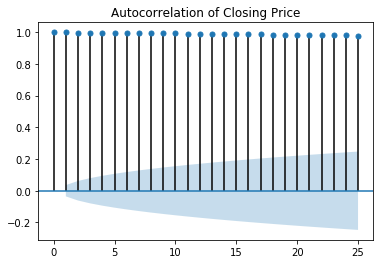

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(dataset['Adj Close'],lags=25,title="Autocorrelation of Closing Price")
plt.show()

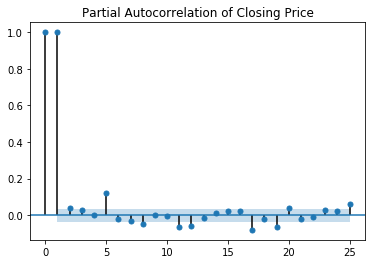

In [20]:
plot_pacf(dataset['Adj Close'],lags=25,title="Partial Autocorrelation of Closing Price")
plt.show()

## Trends, Seasonality and noise

Trend - Upwards or downwards slope of a time series

Seasonality - A periodic pattern of a time series
    
Noise - Outliers or missing values

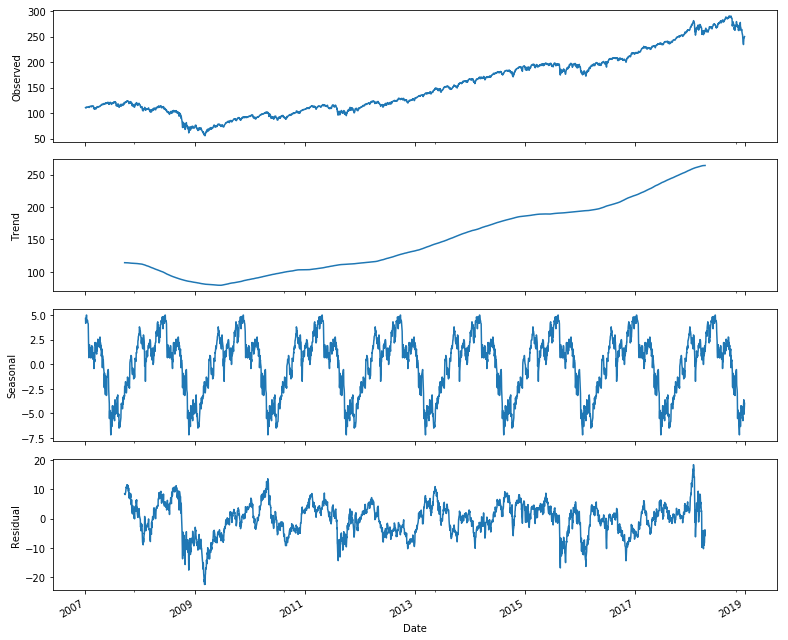

In [21]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposed_stock = sm.tsa.seasonal_decompose(dataset["Adj Close"],freq=360) # The frequncy is annual
fig = decomposed_stock.plot()
plt.show()

In [22]:
# Augmented Dickey-Fuller test on stock Price
from statsmodels.tsa.stattools import adfuller

adf = adfuller(dataset["Adj Close"])
print("p-value of stock: {}".format(float(adf[1])))

p-value of stock: 0.9763381724203282


A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis. (https://www.dummies.com/education/.../what-a-p-value-tells-you-about-statistical-data/)

In [23]:
p_value = adf[1]
if p_value < 0.05:
    print("We reject the null hypothesis.")
    print("There's no difference between the means.")
    print("A significant difference does exist.")
else:
    print("p-value is larger > 0.05.")
    print("A significant difference exists.")

p-value is larger > 0.05.
A significant difference exists.


## Test for timeseries

In [24]:
ts = dataset['Adj Close']
ts.head()

Date
2007-01-04    110.755142
2007-01-05    109.871742
2007-01-08    110.379898
2007-01-09    110.286095
2007-01-10    110.653534
Name: Adj Close, dtype: float64

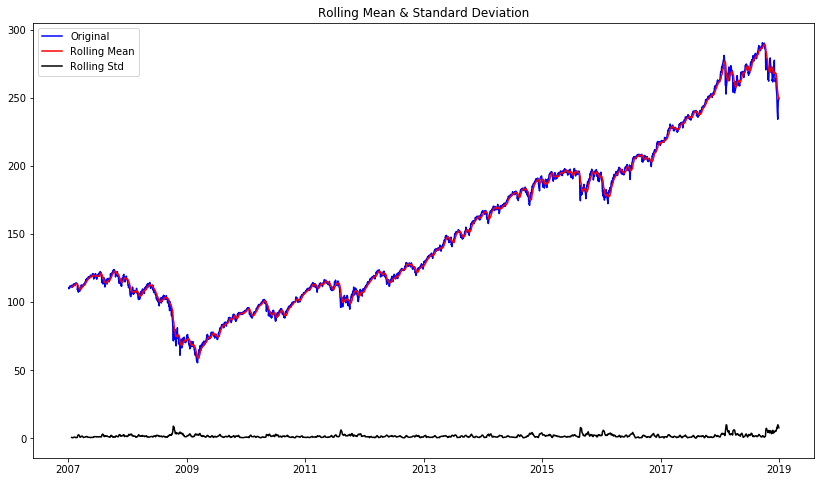

In [25]:
rolmean = ts.rolling(12).mean()
rolstd = ts.rolling(12).std()

#Plot rolling statistics:
plt.figure(figsize=(14,8))
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

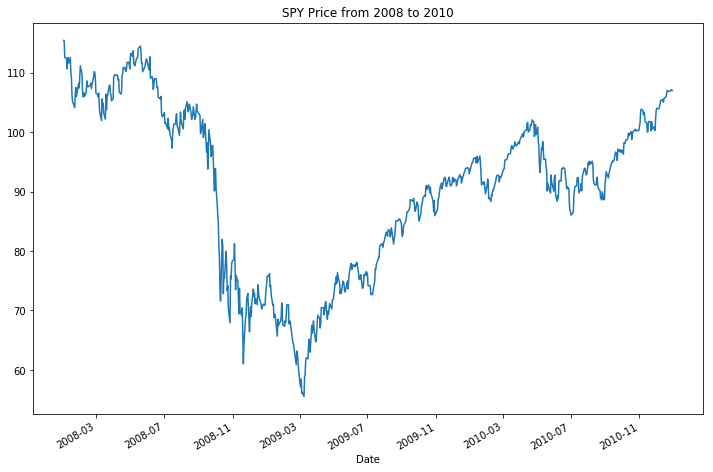

In [26]:
ts['2008':'2010'].plot(subplots=True, figsize=(12,8))
plt.title('SPY Price from 2008 to 2010')
plt.show()

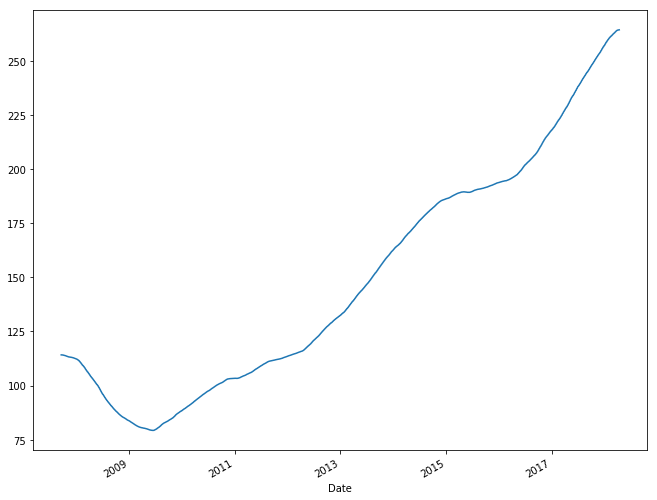

In [27]:
# The original non-stationary plot
decomposed_stock.trend.plot()

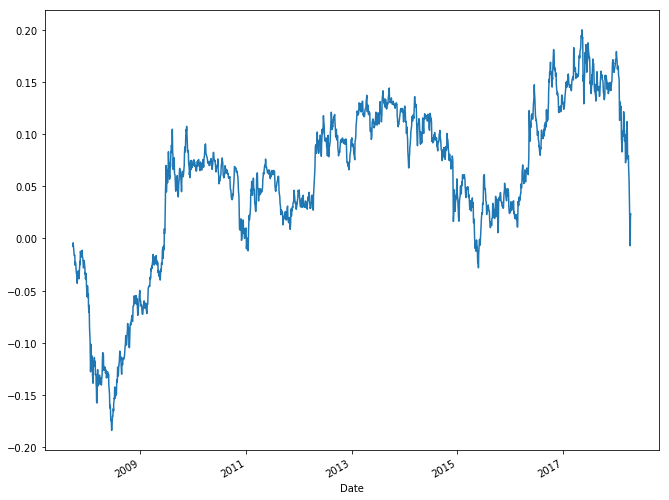

In [28]:
# The new stationary plot
decomposed_stock.trend.diff().plot()

## AR Models

Autoregressive (AR) model is a representation of a type of random process and is used to describe certain time-varying processes.

In [29]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error

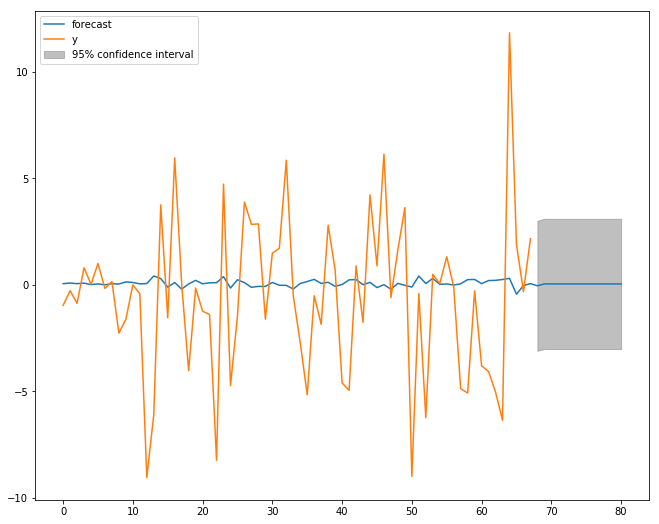

In [53]:
# Predicting Closing prices for stock
model = ARMA(dataset["Adj Close"].diff().iloc[1:].values, order=(1,0))
result = model.fit()
result.plot_predict(start=2950, end=3030)
plt.show()

In [31]:
model = ARMA(dataset["Adj Close"].diff().iloc[1:].values, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(1, 0)   Log Likelihood               -5620.904
Method:                       css-mle   S.D. of innovations              1.558
Date:                Tue, 05 Mar 2019   AIC                          11247.808
Time:                        10:45:26   BIC                          11265.845
Sample:                             0   HQIC                         11254.294
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0461      0.027      1.692      0.091      -0.007       0.099
ar.L1.y       -0.0411      0.018     -2.258      0.024      -0.077      -0.005
                                    Roots           

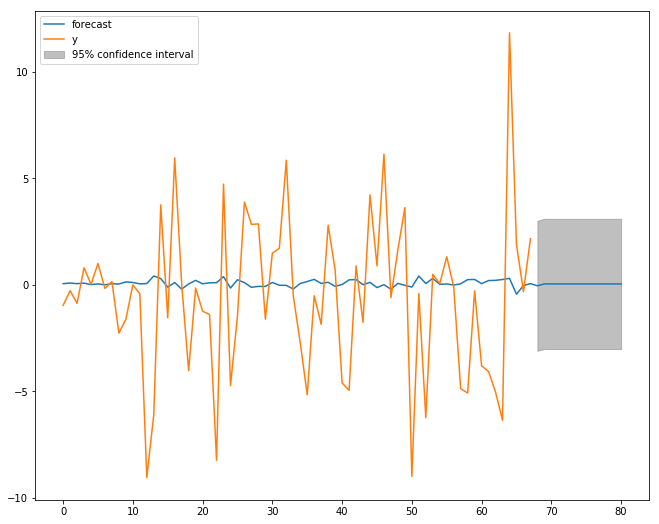

In [54]:
# Forecast the model
result.plot_predict(start=2950, end=3030)
plt.show()

In [58]:
# Find the mean squared error
rmse = math.sqrt(mean_squared_error(dataset["Adj Close"].diff().iloc[2950:3018].values, result.predict(start=2950, end=3017)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 3.942875816903363.
